# Diagnostics and Overlap Checks

Diagnostics help flag weak overlap and heavy-tailed weights before trusting
off-policy estimates. This notebook computes overlap metrics, ESS, and
weight-tail summaries from a synthetic bandit dataset.

In [1]:
from __future__ import annotations

from pprint import pprint

import numpy as np

from crl.benchmarks.bandit_synth import SyntheticBandit, SyntheticBanditConfig
from crl.diagnostics.ess import effective_sample_size, ess_ratio
from crl.diagnostics.overlap import compute_overlap_metrics
from crl.diagnostics.plots import plot_ratio_histogram, plot_weight_histogram
from crl.diagnostics.weights import weight_tail_stats

In [2]:
np.random.seed(0)

benchmark = SyntheticBandit(SyntheticBanditConfig(seed=7))
dataset = benchmark.sample(num_samples=1_000, seed=11)

In [3]:
# Importance weights for the target policy on logged actions.

target_probs = benchmark.target_policy.action_prob(dataset.contexts, dataset.actions)
behavior_probs = dataset.behavior_action_probs
ratios = target_probs / behavior_probs

metrics = {
    "overlap": compute_overlap_metrics(target_probs, behavior_probs, threshold=1e-3),
    "ess": effective_sample_size(ratios),
    "ess_ratio": ess_ratio(ratios),
    "weight_tail": weight_tail_stats(ratios, quantile=0.99, threshold=10.0),
}

pprint(metrics)

{'ess': 274.4383562766495,
 'ess_ratio': 0.2744383562766495,
 'overlap': {'fraction_behavior_below_threshold': 0.0,
             'fraction_target_below_threshold': 0.0,
             'min_behavior_prob': 0.03299587809697094,
             'min_target_prob': 0.027616632615836016,
             'ratio_max': 16.929594362968285,
             'ratio_min': 0.10386828494076138,
             'ratio_q50': 0.5085768914864273,
             'ratio_q90': 1.4105948755054858,
             'ratio_q99': 4.773722831847077,
             'support_violations': 0},
 'weight_tail': {'max': 16.929594362968285,
                 'q99': 4.773722831847077,
                 'tail_fraction': 0.005}}


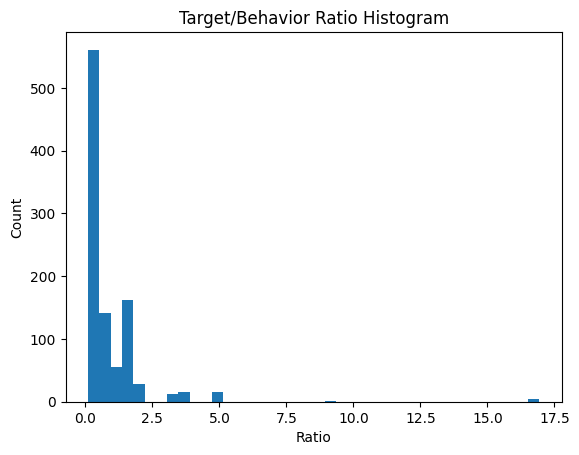

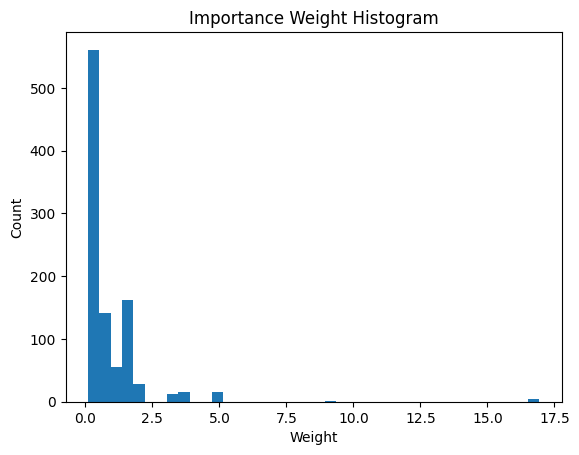

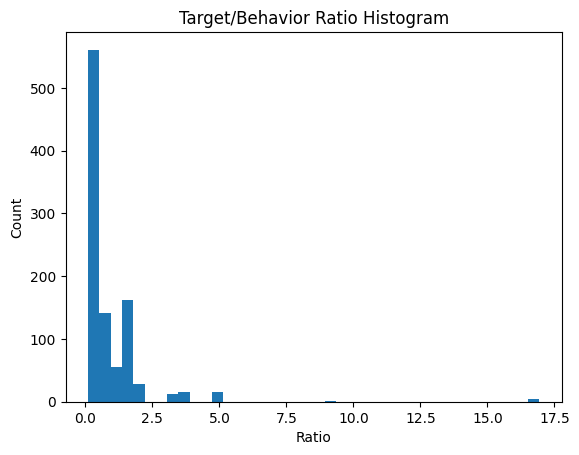

In [4]:
# Optional plots (requires matplotlib).
plot_weight_histogram(ratios, bins=40)
plot_ratio_histogram(ratios, bins=40)